###    First, We'll import our libraries and data.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hotel_bookings.csv')

### A quick look throug the data.

In [46]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [47]:
unique = [df[e].unique() for e in df.columns]
unique

[array(['Resort Hotel', 'City Hotel'], dtype=object),
 array([0, 1], dtype=int64),
 array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
         37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
         45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
         76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
        368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
         86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
         34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
         67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
         22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
        116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
         46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
        124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
        150, 143, 151, 132, 125, 157, 147

##### After checking the [ouput text](nb_unique_output.txt), the data looks pretty clean!
###### Thanks to Thomas Mock and Antoine Bichat ـ [#TidyTuesday during the week of February 11th, 2020](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md).

C:\Users\20155\AppData\Local\Temp/ipykernel_9372/4055604144.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax);


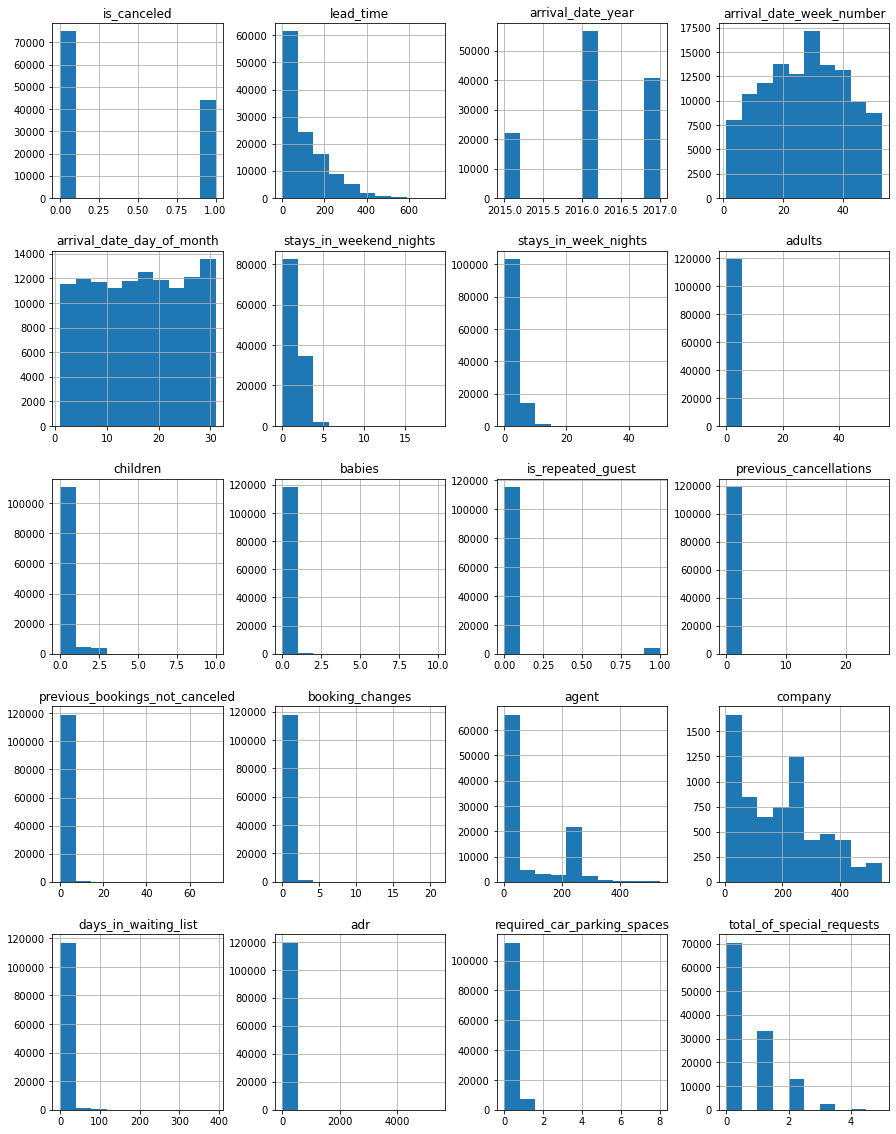

In [48]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax);

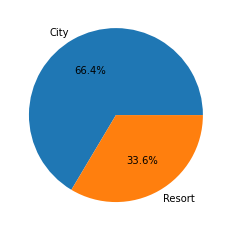

In [49]:
plt.pie(df.hotel.value_counts(), labels = ['City', 'Resort'], autopct = '%1.1f%%');


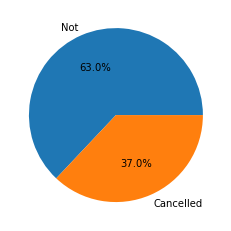

In [50]:
plt.pie(df.is_canceled.value_counts(), labels = ['Not', 'Cancelled'], autopct = '%1.1f%%');


Text(0, 0.5, 'Arrivals')

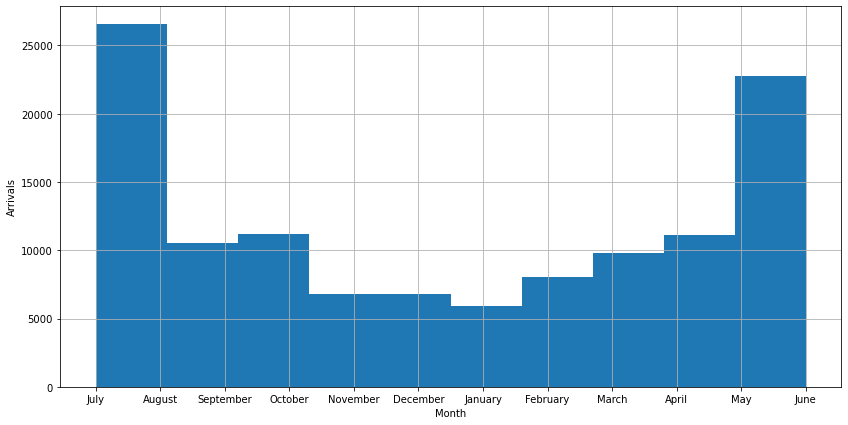

In [51]:
fig = plt.figure(figsize = (14,7))
ax = fig.gca()
df.arrival_date_month.hist(ax = ax);
ax.set_xlabel('Month')
ax.set_ylabel('Arrivals')


### We may now put some guide lines and questions to focus on.

##### How date affect the customers?
* Can We relate date to cancelled and continued reservations?
* Does it affect the hotel type (City or Resort)?
* Date and Adult-Children-Babies combination.
* What about country?

##### How previous reservations affect the last one?
* Can We relate previous cancellations and continuities to the last reservation?

##### Travel agency ID and country?
* What about cancellations and continuities?
* Repeatability of customers.
 

In [52]:
#First We may need to join the three columns of year, month and day to create a new column called arrival_date
df['arrival_date'] = df.arrival_date_year.astype(str) + '-' + df.arrival_date_month.astype(str) + '-' + df.arrival_date_day_of_month.astype(str)
#Then we can drop the three columns
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis = 1, inplace = True)
#We can also drop the rows where the arrival_date is null
df.dropna(subset = ['arrival_date'], inplace = True)
#We can also drop the rows where the arrival_date is not a date
df.drop(df[df.arrival_date.str.contains('-') == False].index, inplace = True)
#We can change the format of the arrival_date column to date
df.arrival_date = pd.to_datetime(df.arrival_date)

Text(0, 0.5, 'Number of Bookings')

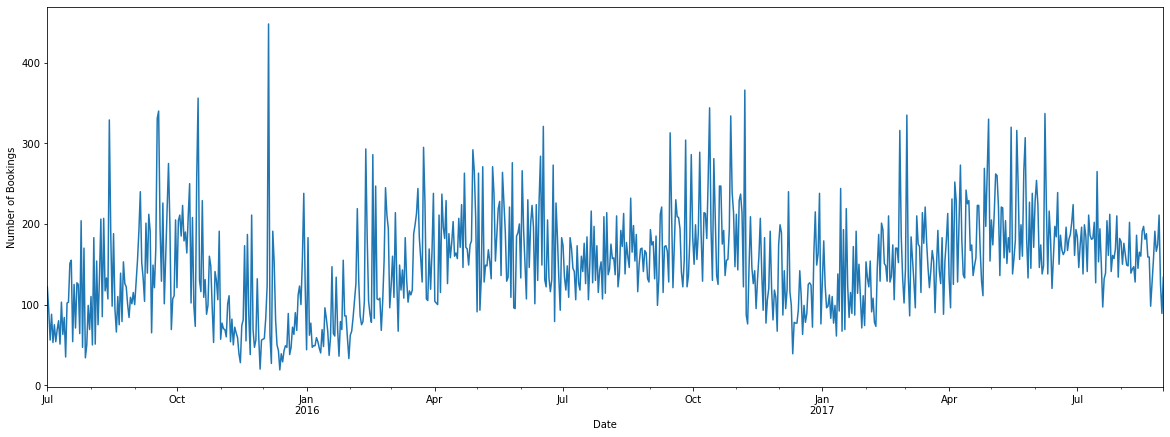

In [53]:
#Plot number of bookings per day
fig = plt.figure(figsize = (20,7))
ax = fig.gca()
df.arrival_date.value_counts().sort_index().plot(ax = ax);
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bookings')

Text(0, 0.5, 'Number of Bookings')

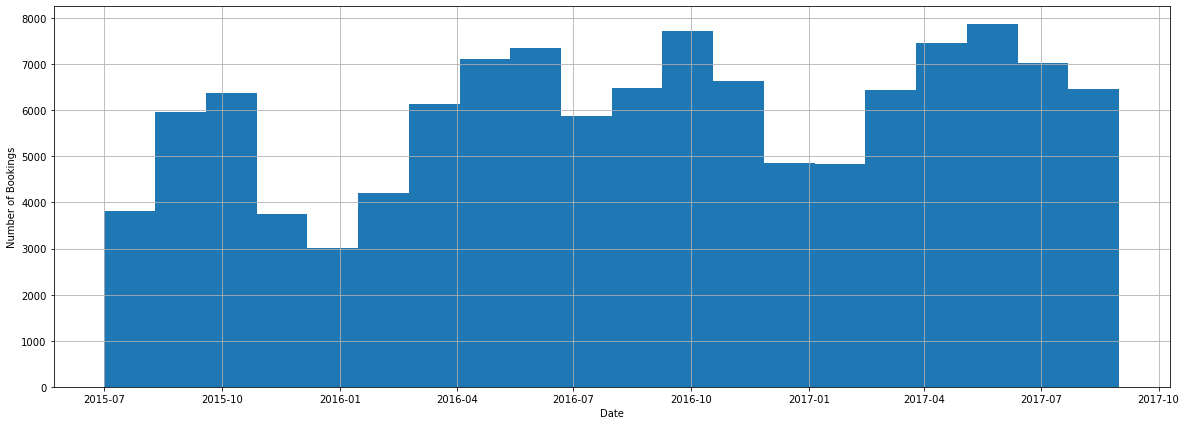

In [54]:
#Peak time of bookings every year
fig = plt.figure(figsize = (20,7))
ax = fig.gca()
df.arrival_date.hist(ax = ax, bins=20);
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bookings')

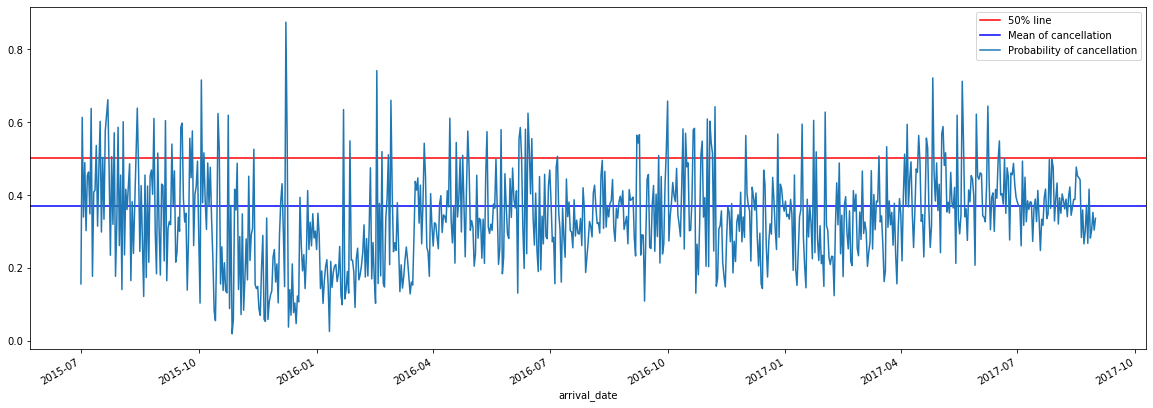

In [55]:
#Plot how is_cancelled is related to arrival_date
fig = plt.figure(figsize = (20,7))
ax = fig.gca()
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = df.is_canceled.mean(), color = 'b', linestyle = '-')
df.groupby(df.arrival_date).is_canceled.mean().plot(ax = ax);
ax.legend(['50% line' ,'Mean of cancellation', 'Probability of cancellation']);

Text(0, 0.5, 'Number of Bookings')

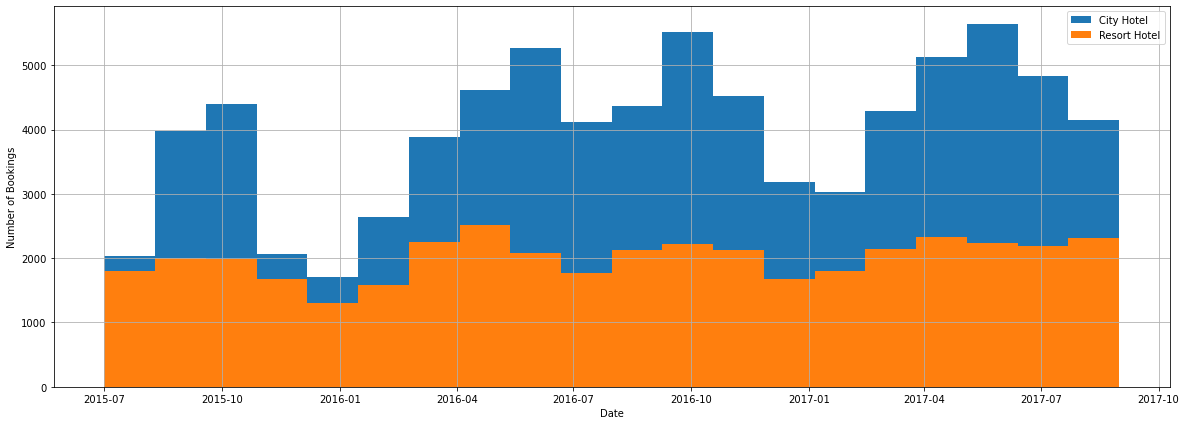

In [56]:
#Histogram hotel vs arrival_date
fig = plt.figure(figsize = (20,7))
ax = fig.gca()
df.arrival_date.groupby(df.hotel).hist(ax = ax, bins = 20);
ax.legend(labels=['City Hotel', 'Resort Hotel']);
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bookings')

Text(0, 0.5, 'Number of Bookings')

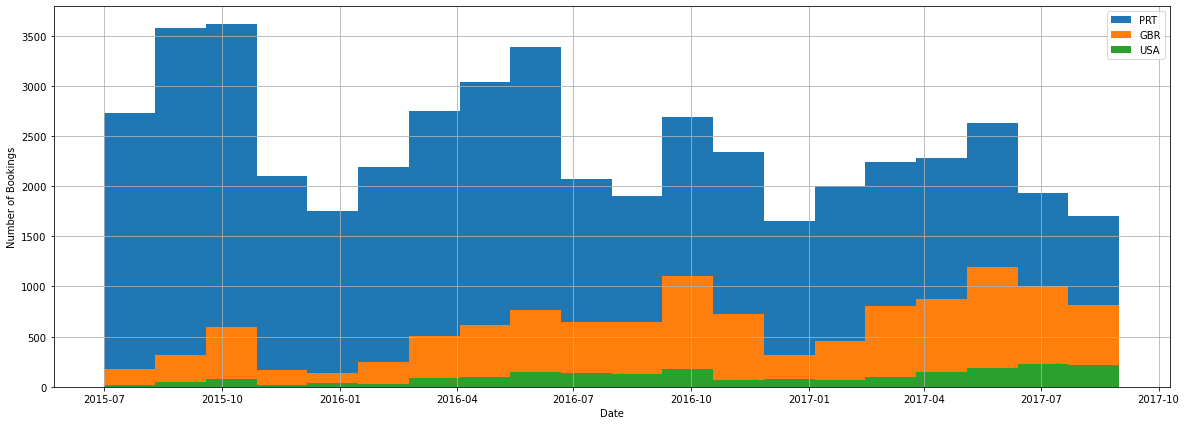

In [57]:
#Histogram coountry vs arrival_date
fig = plt.figure(figsize = (20,7))
ax = fig.gca()
df.arrival_date.groupby(df.country[df.country == 'PRT']).hist(ax = ax, bins = 20);
df.arrival_date.groupby(df.country[df.country == 'GBR']).hist(ax = ax, bins = 20);
df.arrival_date.groupby(df.country[df.country == 'USA']).hist(ax = ax, bins = 20);


ax.legend(labels = df.country.unique()[:5]);
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bookings')

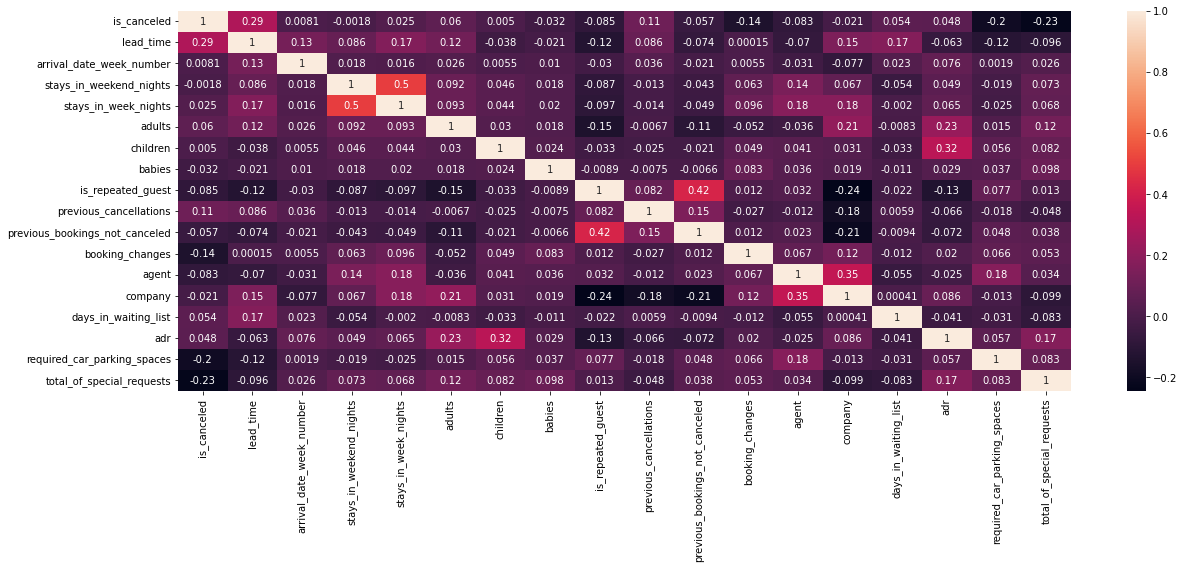

In [58]:
#Create a heatmap for df
fig = plt.figure(figsize = (20,7))
ax = fig.gca()
sns.heatmap(df.corr(), annot = True, ax = ax);


##### Here We can see a bunch of questions to ask. As well as some guide lines. 
###### For starters, We can see a quite obvious relationsip between lead time and cancellation, maybe people get bored of waiting, previous cancellations also seems to have one. A path to be taken here is to see if there is a relationship between the lead time, previous cancellations, days in waiting list and the current cancellation.
###### A nice thing to notice is that days in waiting list when using a company is really insignificant. Here We may want to see if coming through a company is a good indicator of cancellation. Although, it has a really small linear relationship with cancellation, it may have a non-linear one.

In [59]:
import statsmodels.formula.api as smf
formula = ('days_in_waiting_list ~ previous_cancellations + C(is_repeated_guest)')
results = smf.ols(formula, data=df).fit()

In [60]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:              OLS                  Adj. R-squared:     0.001       
Dependent Variable: days_in_waiting_list AIC:                1023478.1299
Date:               2022-05-20 22:38     BIC:                1023507.2003
No. Observations:   119390               Log-Likelihood:     -5.1174e+05 
Df Model:           2                    F-statistic:        33.15       
Df Residuals:       119387               Prob (F-statistic): 4.05e-15    
R-squared:          0.001                Scale:              309.41      
-------------------------------------------------------------------------
                           Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                  2.3801   0.0519 45.8269 0.0000  2.2783  2.4818
C(is_repeated_guest)[T.1] -2.2901   0.2906 -7.8802 0.0000 -2.8597 -1.7205
previous_cancellations     0.1628   0.0605  2.6907 0.0071  0.0442  0.2814
-------------------------------------------------------------------------
Omnibus:             203331.659      Durbin-Watson:         0.731        
Prob(Omnibus):       0.000           Jarque-Bera (JB):      176490056.757
Skew:                11.944          Prob(JB):              0.000        
Kurtosis:            189.836         Condition No.:         6            
=========================================================================

"""

##### It seems like there is a weak positive linear relationship between previous cancellation and days in waiting list, that makes sense. Being a repeated guest also decreases your waiting time.

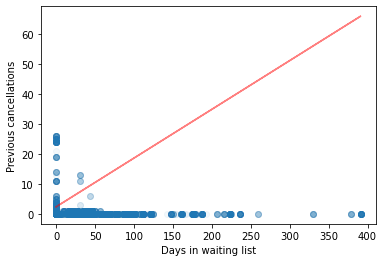

In [61]:
plt.plot(df.days_in_waiting_list, df.previous_cancellations, 'o', alpha = 0.05);
plt.xlabel('Days in waiting list');
plt.ylabel('Previous cancellations');
#plot a line with slope of prvious_cancellations coeff from results
plt.plot(df.days_in_waiting_list, 0.1628 * df.days_in_waiting_list + 2.3801	, 'r-', alpha = 0.5);

##### False alarm, the relationship between days in waiting list and cancellation is not linear. But looks oddly reciprocal. The hotel ,probably, doesn't have a merit-based system to manage guests.

In [62]:
import datetime as dt
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['arrival_date'] = df['arrival_date'].map(dt.datetime.toordinal)
formula = ('required_car_parking_spaces ~ previous_cancellations + C(is_repeated_guest) + adults + children + babies + arrival_date')
results = smf.ols(formula, data=df).fit()

In [63]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:              OLS                         Adj. R-squared:     0.012    
Dependent Variable: required_car_parking_spaces AIC:                1779.4833
Date:               2022-05-20 22:38            BIC:                1847.3142
No. Observations:   119386                      Log-Likelihood:     -882.74  
Df Model:           6                           F-statistic:        250.1    
Df Residuals:       119379                      Prob (F-statistic): 3.82e-319
R-squared:          0.012                       Scale:              0.059426 
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------------------
Intercept                     18.7422   2.3479  7.9824 0.0000 14.1403 23.3441
C(is_repeated_guest)[T.1]      0.1190   0.0041 29.2039 0.0000  0.1110  0.1269
previous_cancellations        -0.0077   0.0008 -9.1072 0.0000 -0.0094 -0.0060
adults                         0.0109   0.0012  8.8382 0.0000  0.0085  0.0133
children                       0.0359   0.0018 20.1952 0.0000  0.0324  0.0394
babies                         0.0902   0.0072 12.4481 0.0000  0.0760  0.1044
arrival_date                  -0.0000   0.0000 -7.9673 0.0000 -0.0000 -0.0000
-----------------------------------------------------------------------------
Omnibus:               104522.167        Durbin-Watson:           1.625      
Prob(Omnibus):         0.000             Jarque-Bera (JB):        4595711.066
Skew:                  4.090             Prob(JB):                0.000      
Kurtosis:              32.274            Condition No.:           2450048930 
=============================================================================
* The condition number is large (2e+09). This might indicate
strong multicollinearity or other numerical problems.
"""

##### No significant values here.